<a href="https://colab.research.google.com/github/arifariofficial/google-collab/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

##Tensor

###Initializing a Tensor

####Directly from data

In [ ]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

####From a NumPy array

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

####From another tensor

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
x_ones

tensor([[1, 1],
        [1, 1]])

In [ ]:
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
x_rand

tensor([[0.5012, 0.4983],
        [0.3364, 0.2632]])

####With random or constant values:
shape is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [ ]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
rand_tensor

tensor([[0.6765, 0.8104, 0.9253],
        [0.2269, 0.6452, 0.1480]])

In [ ]:
one_tensor = torch.ones(shape)
one_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
zeros_tensor = torch.zeros(shape)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

###Attributes of a Tensor
Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")

Shape of tensor: torch.Size([3, 4])


In [ ]:
print(f"Datatype of tensor: {tensor.dtype}")

Datatype of tensor: torch.float32


In [ ]:
print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cpu


###Operations on Tensors

By default, tensors are created on the CPU. We need to explicitly move tensors to the accelerator using .to method (after checking for accelerator availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!

In [ ]:
# We move our tensor to the current accelerator if available
if torch.cuda.is_available():
    tensor = tensor.to(torch.accelerator.current_accelerator())

####Standard numpy-like indexing and slicing

In [ ]:
tensor = torch.ones(4, 4)
tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])


In [ ]:
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Second column: {tensor[:, 1]}")

First row: tensor([1., 0., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Second column: tensor([0., 0., 0., 0.])


####Joining tensors

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


##Datasets & DataLoaders
Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

####Loading a Dataset

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

We load the FashionMNIST Dataset with the following parameters:
- `root` is the path where the train/test data is stored,
- `train` specifies training or test dataset,
- `download=True` downloads the data from the internet if it’s not available at root.
- `transform` and `target_transform` specify the feature and label transformations

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 116MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 8.25MB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 67.3MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 14.6MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

####Iterating and Visualizing the Dataset

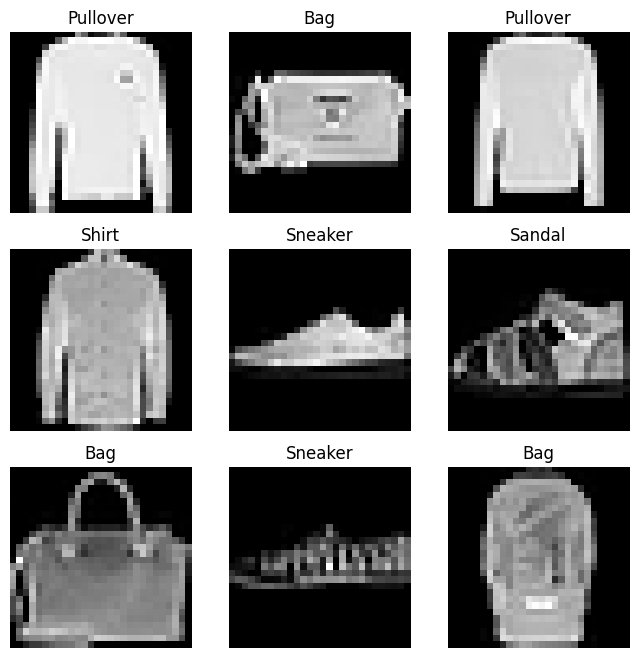

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()